# 迴歸模型練習

In [2]:
from sklearn import linear_model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
X, y = make_regression(n_samples=200, n_features=1, noise=3, random_state=66)

Text(0.5, 1.0, 'Data Visualization')

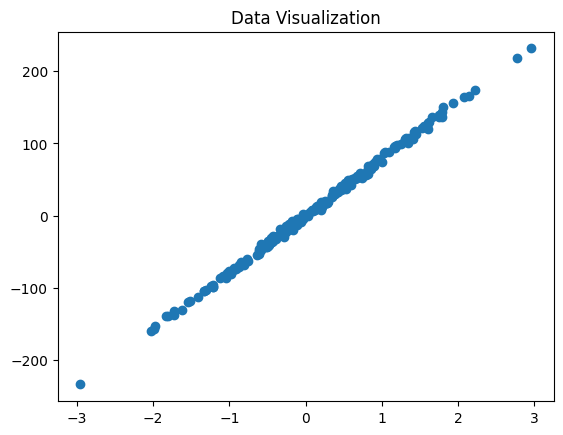

In [4]:
# 資料視覺化
plt.scatter(X, y)
plt.title('Data Visualization')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

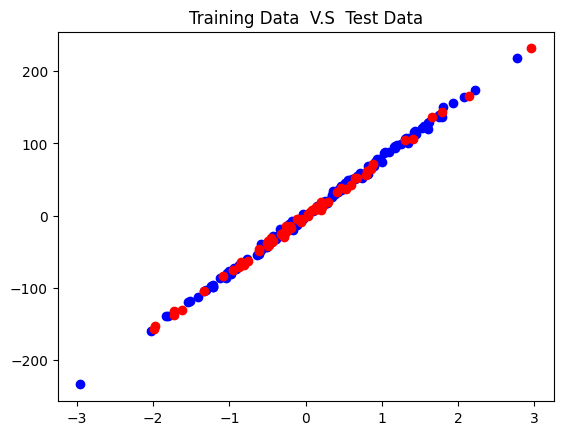

In [6]:
#藍點為訓練集資料，紅點為測試集資料
plt.scatter(X_train, y_train, color= 'blue')
plt.scatter(X_test, y_test, color= 'red')
plt.title('Training Data  V.S  Test Data')
plt.show()

### 簡單線性迴歸

In [7]:
regr = linear_model.LinearRegression().fit(X_train, y_train)

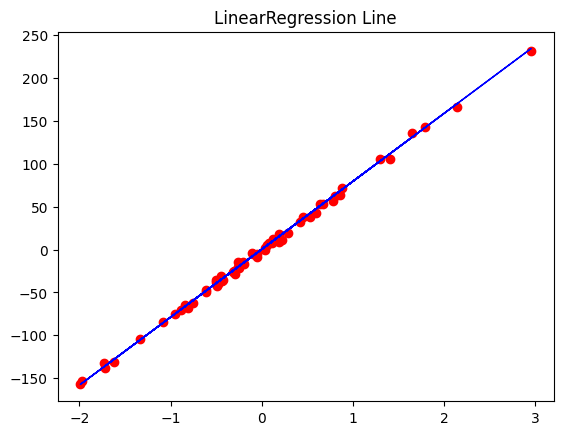

In [8]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, regr.predict(X_test), color = 'blue', linewidth=1)
plt.title('LinearRegression Line')
plt.show()

### `regr.intercept_` 和 `regr.coef_` 使用

**`regr.intercept_` (截距)**
   - **定義**：表示當自變數（輸入特徵，通常記為 \( X \)）的值為 0 時，目標變數（輸出，通常記為 \( Y \)）的預測值。
   - **意義**：這是回歸線與 \( Y \)-軸的交點，代表基本的偏移量。

**`regr.coef_` (係數，或稱斜率)**
   - **定義**：表示每個自變數對目標變數的影響，即當自變數增加 1 單位時，目標變數的變化量。
   - **意義**：它描述了迴歸線的斜率，數值越大，影響越顯著。
   - **注意**：如果有多個自變數（多元迴歸），`regr.coef_` 會是一個陣列，表示每個特徵對 \( Y \) 的影響。

In [9]:
w_0 = regr.intercept_
w_1 = regr.coef_
print(f'截距 = {w_0}')
print(f'係數（斜率）= {w_1}')

截距 = 0.30712628134945064
係數（斜率）= [79.23650786]


---
### 1. 數值解釋：
- **截距（\( w_0 \)）= 0.30712628134945064**  
  當自變數（輸入特徵 \( X \)）的值為 0 時，目標變數（輸出 \( Y \)）的預測值為 **0.3071**（四捨五入到小數點後四位）。

- **斜率（\( w_1 \)）= [79.23650786]**  
  當自變數 \( X \) 增加 1 單位時，目標變數 \( Y \) 增加 **79.23650786** 單位。
### ２. 模型的迴歸公式：
\[
Y = 79.23650786．X + 0.3071
\]
### ３. 應用案例：
- 如果 \( X = 0 \)：  
  \[
  Y = 0.3071 （即截距）
  \]
- 如果 \( X = 1 \)：  
  \[
  Y = 79.23650786．1 + 0.3071 =  79.54360786
  \]
### ４. 結論：
- 此模型顯示 \( X \) 對 \( Y \) 有很大的影響，斜率 **79.23650786** 表示 \( X \) 每增加 1 單位，\( Y \) 會增長 79.23650786。
- 截距值相對較小，說明當 \( X = 0 \) 時，\( Y = 0.3071 \) 基礎值不大。

---

### R平方

In [10]:
train_R2 = regr.score(X_train, y_train)
print(f'Training data R平方 = {train_R2}')
print('\n')
print('訓練集資料，R平方，越高越好，表示準確程度越高')

Training data R平方 = 0.9985022529438589


訓練集資料，R平方，越高越好，表示準確程度越高


In [11]:
test_R2 = regr.score(X_test, y_test)
print(f'Test data R平方 = {test_R2}')
print('\n')
print('測試集資料，R平方，越高越好，表示準確程度越高')

Test data R平方 = 0.998094924977807


測試集資料，R平方，越高越好，表示準確程度越高


---
## Gradient Decent 梯度下降法

### 變數和設定的意義

1. **`alpha = 0.001`**
   - **學習率（Learning Rate）：**
     - 控制每次參數更新的步伐大小。
     - 學習率太小會導致收斂過慢，太大可能會導致不穩定或跳過最優解。

2. **`repeats = 100`**
   - **最大迭代次數：**
     - 梯度下降法的循環次數，表示更新參數的次數。
     - 目的是逐漸讓參數 \( w_0 \) 和 \( w_1 \) 收斂到損失函數的最小值。

3. **`w0 = 0` 和 `w1 = 0`**
   - **初始化參數：**
     - 梯度下降法需要從某個初始值開始，這裡將 \( w_0 \) 和 \( w_1 \) 都設為 0。
     - 初始值對收斂速度可能有影響，但在凸問題中最終結果不會改變。

4. **`error = []`**
   - **誤差列表：**
     - 用於記錄每次迭代的損失函數值（誤差），方便分析收斂過程。
     - 常見損失函數包括均方誤差（MSE）。

5. **`point = []`**
   - **參數記錄：**
     - 用於記錄每次迭代時的參數值 \( (w_0, w_1) \)。
     - 方便可視化參數的變化過程，觀察梯度下降的軌跡。

In [12]:
alpha = 0.001 #learning rate 學習率
repeats = 10000 #迭代次數(梯度下降法的循環次數)

# Initializing variables 初始化參數
w0 = 0  
w1 = 0  
errors = [] #用於記錄每次迭代的損失函數值（誤差）
points = [] #用於記錄每次迭代時的參數值

In [13]:
for j in range(repeats):
    error_sum = 0
    squared_error_sum = 0
    error_sum_x = 0
    for i in range(len(X_train)):
        predict = w0 + (X_train[i] * w1)
        squared_error_sum = squared_error_sum + (y_train[i] - predict) ** 2
        error_sum = error_sum + (y_train[i] - predict)
        error_sum_x = error_sum_x + (y_train[i] - predict) * X_train[i]
    w0 = w0 + (alpha * error_sum)
    w1 = w1 + (alpha * error_sum_x)
    errors.append(squared_error_sum / len(X_train))

print('w0: %2f' % w0)
print('w1: %2f' % w1)

w0: 0.307126
w1: 79.236508


/var/folders/2k/sw8w3mj923v232q1s3ltrpjm0000gn/T/ipykernel_1964/2969938528.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w0: %2f' % w0)
/var/folders/2k/sw8w3mj923v232q1s3ltrpjm0000gn/T/ipykernel_1964/2969938528.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('w1: %2f' % w1)


In [14]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict = w0 + (X_test[i] * w1)
    predicts.append(predict)

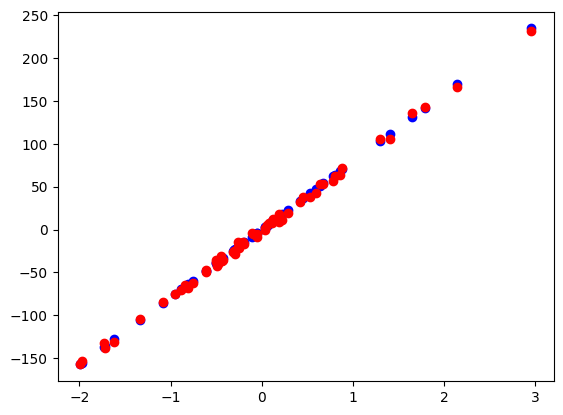

In [15]:
plt.scatter(X_test, predicts, color ='blue')
plt.scatter(X_test, y_test, color='red')
plt.show()

--- 

## Polynomial Regression

In [16]:
import random
# 設定隨機種子
random.seed(33)

# 產生 50 個 1 到 100 之間的小到大隨機數字
random_numbers_size = sorted(random.sample(range(1, 300), 100))
random_numbers_price = sorted(random.sample(range(400, 2000), 100))

# 顯示隨機數字
print(f'size:{random_numbers_size}')
print(f'price:{random_numbers_price}')

size:[1, 3, 4, 9, 15, 17, 18, 24, 27, 29, 31, 32, 34, 37, 39, 50, 52, 61, 63, 64, 71, 79, 82, 86, 90, 92, 93, 94, 95, 96, 98, 100, 105, 110, 114, 117, 118, 120, 122, 124, 125, 126, 138, 139, 140, 142, 144, 145, 146, 151, 154, 155, 156, 159, 161, 163, 164, 165, 168, 171, 174, 175, 176, 182, 186, 188, 192, 195, 200, 202, 203, 207, 212, 219, 222, 224, 226, 228, 246, 247, 254, 255, 257, 258, 261, 263, 265, 266, 271, 272, 273, 276, 277, 278, 283, 290, 291, 293, 294, 299]
price:[413, 422, 426, 433, 442, 447, 463, 468, 471, 481, 532, 546, 560, 579, 581, 582, 588, 616, 630, 640, 682, 718, 734, 743, 753, 779, 786, 806, 807, 829, 866, 933, 953, 972, 976, 986, 1033, 1045, 1050, 1054, 1065, 1085, 1124, 1150, 1154, 1160, 1194, 1213, 1232, 1246, 1264, 1276, 1288, 1290, 1335, 1347, 1367, 1384, 1386, 1389, 1413, 1419, 1422, 1438, 1447, 1481, 1539, 1573, 1574, 1594, 1601, 1604, 1632, 1647, 1653, 1673, 1674, 1677, 1680, 1723, 1745, 1775, 1784, 1792, 1814, 1837, 1857, 1877, 1883, 1893, 1894, 1917, 1929, 

In [17]:
series_dict={'X':random_numbers_size, 'y':random_numbers_price}
df = pd.DataFrame(series_dict)
X = df[['X']]
y = df[['y']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=33)

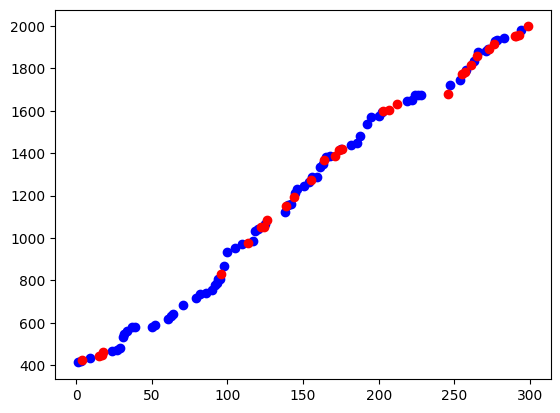

In [19]:
#藍點為訓練集資料，紅點為測試集資料
plt.scatter(X_train, y_train, color = 'blue')
plt.scatter(X_test, y_test, color = 'red')

In [20]:
model = make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [21]:
X_test_sorted = X_test.sort_values(by='X')
y_pred_sorted = model.predict(X_test_sorted)

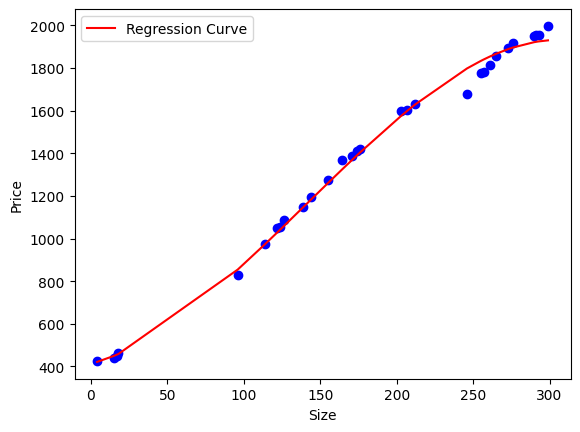

In [22]:
# 繪製回歸曲線
plt.scatter(X_test, y_test,color = 'blue')
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Regression Curve')

# 添加圖例和標籤
plt.xlabel("Size")
plt.ylabel("Price")
plt.legend()
plt.show()

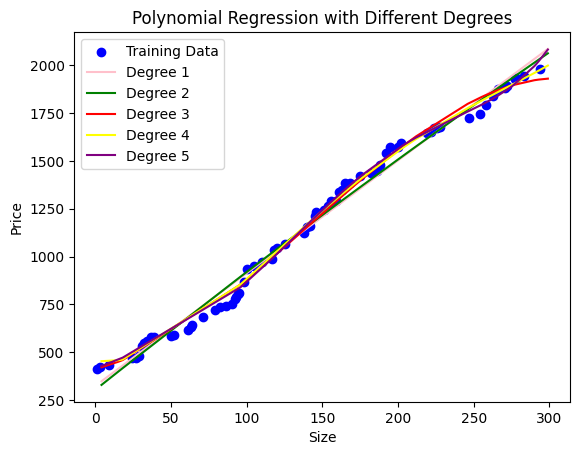

Degree 1: R^2 score = 0.99
Degree 2: R^2 score = 0.99
Degree 3: R^2 score = 1.00
Degree 4: R^2 score = 1.00
Degree 5: R^2 score = 1.00


In [23]:
#使用迴圈的方式測試在幾次方的時候效果最好
#訓練多個模型並繪圖
degrees = [1, 2, 3, 4, 5]
colors = [ 'pink', 'green', 'red', 'yellow', 'purple']  # 為每個 degree 指定顏色
score = []

plt.scatter(X_train, y_train, color='blue', label='Training Data')

for count, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X_train, y_train)
    score.append(model.score(X_train, y_train))
    
    # 排序測試數據以便於繪圖
    X_test_sorted = X_test.sort_values(by='X')
    y_pred_sorted = model.predict(X_test_sorted)
    
    # 使用正確的 color 參數
    plt.plot(X_test_sorted, y_pred_sorted, color=colors[count], label=f'Degree {degree}')

# 添加圖例與標籤
plt.legend(loc='upper left')
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Polynomial Regression with Different Degrees")
plt.show()

# 顯示每個模型的 R^2 分數
for degree, r2 in zip(degrees, score):
    print(f'Degree {degree}: R^2 score = {r2:.2f}')

---
## Multivarable Regression 多元回歸 

In [25]:
X, y = make_regression(n_samples= 100 , n_features= 5, noise= 50) #n_features= 5 (五個特徵)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 33)

In [28]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [29]:
print('branch test ')

branch test
